In [ ]:
### Capstone Project Thread

In [ ]:
# Merging datasets from website / making new CSV File

import pandas as pd

trips_report = pd.read_csv("trips-report (2).csv", delimiter='\t')
rankings_report = pd.read_csv("rankings-report.csv", delimiter='\t')

merged_df = pd.merge(trips_report, rankings_report, on="Machine Name", how="inner")

print(merged_df)

merged_df.to_csv("dataset.csv", index=False)

    Machine Name  Driver Name         Start Date_x             End Date  \
0         GDX899          NaN  2023-01-01 18:28:15  2024-02-29 05:35:19   
1         JYY100          NaN  2023-01-01 18:36:40  2024-02-29 14:55:15   
2         LKN500          NaN  2023-01-01 18:45:33  2024-02-29 10:50:13   
3         JYY099          NaN  2023-01-01 18:46:41  2024-02-29 10:05:26   
4         TMY814          NaN  2023-01-01 19:34:16  2024-02-29 12:12:29   
..           ...          ...                  ...                  ...   
125       STX940          NaN  2023-02-20 09:14:43  2024-02-29 11:55:53   
126       TDZ183          NaN  2023-02-20 10:52:13  2024-02-29 07:02:15   
127       STX939          NaN  2023-02-21 13:13:31  2024-02-29 12:00:34   
128       STX941          NaN  2023-04-14 15:22:23  2024-02-29 14:53:22   
129       GUU395          NaN  2023-11-08 12:12:31  2023-11-15 06:50:27   

     Distance (km)_x  Operation Time (h)  Engine Time (h)  Consumption (L)  \
0            79400.7 

In [ ]:
columns_to_drop = ['Driver Name', 'Start Date_x', 'End Date', 'Start address', 'End address',
                   'Customer Id', 'Customer Name', 'Driver Id', 'Start Date_y', 'Finish date']
merged_df = merged_df.drop(columns=columns_to_drop)

merged_df = merged_df.set_index("Machine Name")

merged_df.to_csv("LAPDataset.csv")
merged_df == ("LAPDataset.csv")

,Distance (km)_x,Operation Time (h),Engine Time (h),Consumption (L),Ton CO2,Flow (mL/s),Performance (km/L),Green Band (%),Odometer (km),Horometer (h),...,Max. brake (km/h/s),Exessive Idle Score,excessiveidlecount,excessiveidletime (h),Green Band Score,Green band total seconds (h),Over Acceleration Score,Over acceleration count,Max. acceleration (rpm),Total Score (%)
Machine Name,,,,,,,,,,,,,,,,,,,,,
GDX899,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
JYY100,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
LKN500,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
JYY099,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
TMY814,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STX940,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
TDZ183,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
STX939,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:

merged_df = pd.read_csv("LAPDataset.csv")
merged_df = merged_df.set_index("Machine Name")

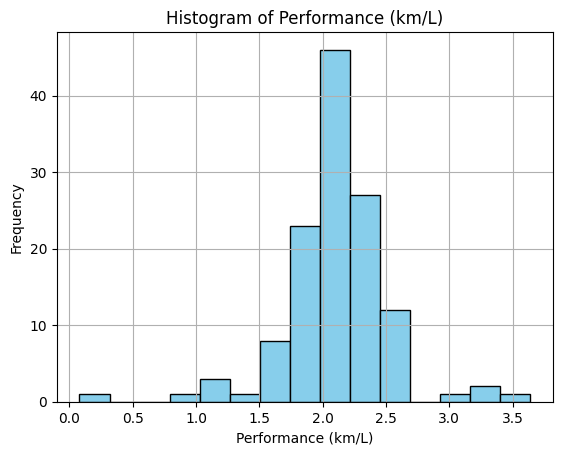

In [ ]:
import matplotlib.pyplot as plt
performance_data = merged_df['Performance (km/L)']

plt.hist(performance_data, bins=15, color='skyblue', edgecolor='black')
plt.title('Histogram of Performance (km/L)')
plt.xlabel('Performance (km/L)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

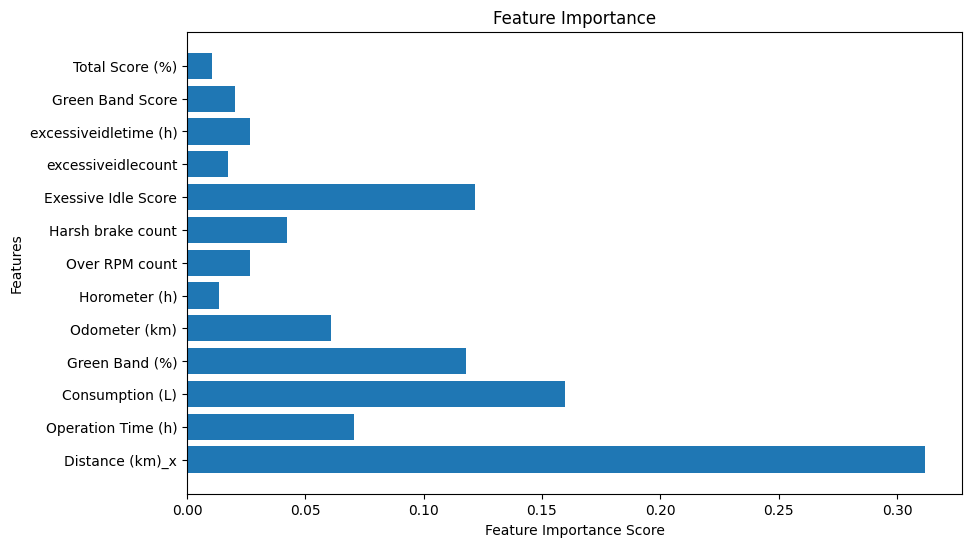

In [ ]:
X = merged_df.drop(columns=['Performance (km/L)'])
y = merged_df['Performance (km/L)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

merged_df = merged_df.dropna(subset=['Performance (km/L)'])
merged_df = merged_df[np.isfinite(merged_df['Performance (km/L)'])]

xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=24, max_depth = 6)
xgb_model.fit(X_train, y_train)
feature_importance = xgb_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [ ]:
all_actual_values = []
all_predicted_values = []

In [ ]:
X = merged_df.drop(columns=['Performance (km/L)'])
y = merged_df['Performance (km/L)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

merged_df = merged_df.dropna(subset=['Performance (km/L)'])
merged_df = merged_df[np.isfinite(merged_df['Performance (km/L)'])]

k_fold = KFold(n_splits=3, shuffle=True, random_state=24)
mse_scores = []

for train_index, test_index in k_fold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    xgb_model = xgb.XGBRegressor(n_estimators=100,
                                 max_depth=6,
                                 reg_lambda = 1,
                                 objective ='reg:squarederror',
                                 random_state=24)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    all_actual_values.extend(y_test)
    all_predicted_values.extend(y_pred)

average_mse = np.mean(mse_scores)
print("Average Mean Squared Error:", average_mse)

Average Mean Squared Error: 0.1654429019698563


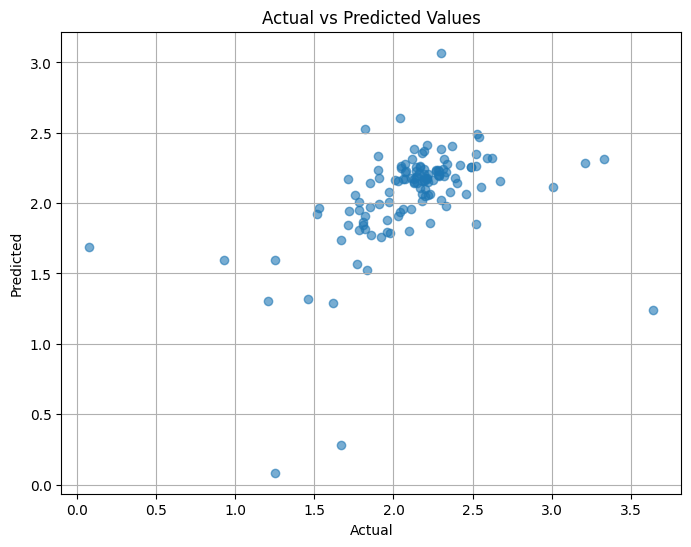

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(all_actual_values, all_predicted_values, alpha=0.6)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

In [ ]:
merged_df.columns

Index(['Distance (km)_x', 'Operation Time (h)', 'Consumption (L)',
       'Performance (km/L)', 'Green Band (%)', 'Odometer (km)',
       'Horometer (h)', 'Over RPM count', 'Harsh brake count',
       'Exessive Idle Score', 'excessiveidlecount', 'excessiveidletime (h)',
       'Green Band Score', 'Total Score (%)'],
      dtype='object')

In [ ]:

columns_to_drop = ['Max. acceleration (rpm)', 'Over acceleration count', 'Over Acceleration Score', 'Green band total seconds (h)',
                   'Max. brake (km/h/s)', 'Harsh Brake Score', 'Max. Rpm (rpm)', 'Over RPM Score', 'Max. Speed (km)', 'Over speed count',
                   'Over Speed Score', 'Distance (km)_y', "Flow (mL/s)", 'Ton CO2', 'Engine Time (h)']
merged_df = merged_df.drop(columns=columns_to_drop)
merged_df.columns


Index(['Distance (km)_x', 'Operation Time (h)', 'Consumption (L)',
       'Performance (km/L)', 'Green Band (%)', 'Odometer (km)',
       'Horometer (h)', 'Over RPM count', 'Harsh brake count',
       'Exessive Idle Score', 'excessiveidlecount', 'excessiveidletime (h)',
       'Green Band Score', 'Total Score (%)'],
      dtype='object')

Average Mean Squared Error: 0.12963266495239437


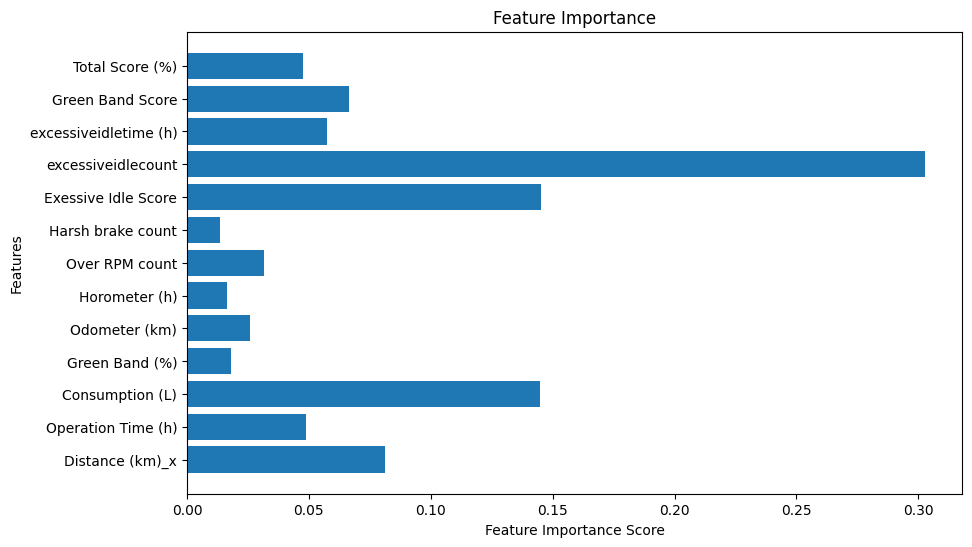

In [ ]:
### Improved Model

all_actual_values2 = []
all_predicted_values2 = []


X = merged_df.drop(columns=['Performance (km/L)'])
y = merged_df['Performance (km/L)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=98)

merged_df = merged_df.dropna(subset=['Performance (km/L)'])
merged_df = merged_df[np.isfinite(merged_df['Performance (km/L)'])]

k_fold = KFold(n_splits=5, shuffle=True, random_state=98)
mse_scores = []

for train_index, test_index in k_fold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    xgb_model = xgb.XGBRegressor(n_estimators=50,
                                 max_depth=5,
                                 reg_lambda = 20,
                                 objective ='reg:squarederror',
                                 random_state=98)
    xgb_model.fit(X_train, y_train)
    feature_importance2 = xgb_model.feature_importances_
    y_pred = xgb_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    all_actual_values2.extend(y_test)
    all_predicted_values2.extend(y_pred)

average_mse = np.mean(mse_scores)
print("Average Mean Squared Error:", average_mse)

plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance2)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

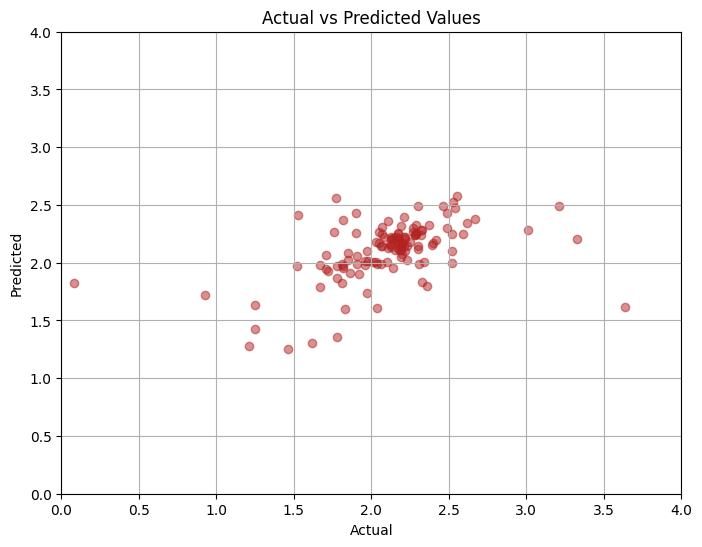

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(all_actual_values2, all_predicted_values2, alpha=0.5, color = 'firebrick')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.grid(True)
plt.show()

In [ ]:
### MODEL FOR 4/4/24 Presentation


In [ ]:
print(trips_df.columns)
print(rankings_df.columns)

Index(['Machine Name', 'Driver Name', 'Start Date', 'End Date',
       'Distance (km)', 'Operation Time (h)', 'Engine Time (h)',
       'Consumption (L)', 'Ton CO2', 'Flow (mL/s)', 'Performance (km/L)',
       'Green Band (%)', 'Odometer (km)', 'Horometer (h)', 'Start address',
       'End address'],
      dtype='object')
Index(['Customer Id', 'Customer Name', 'Driver Id', 'Machine Name',
       'Start Date', 'Finish date', 'Distance (km)', 'Over Speed Score',
       'Over speed count', 'Max. Speed (km)', 'Over RPM Score',
       'Over RPM count', 'Max. Rpm (rpm)', 'Harsh Brake Score',
       'Harsh brake count', 'Max. brake (km/h/s)', 'Exessive Idle Score',
       'excessiveidlecount', 'excessiveidletime (h)', 'Green Band Score',
       'Green band total seconds (h)', 'Over Acceleration Score',
       'Over acceleration count', 'Max. acceleration (rpm)',
       'Total Score (%)'],
      dtype='object')


In [ ]:
# Data Pipeline
import pandas as pd
rankings_df = pd.read_csv("rankings-report (1).csv", delimiter='\t')
trips_df = pd.read_csv("trips-report (4).csv", delimiter = ',')

merged_df = pd.merge(rankings_df, trips_df, on="Machine Name", how="inner")

merged_df.to_csv("newdatasetcpstn.csv", index=False)

print(merged_df)


FileNotFoundError: [Errno 2] No such file or directory: 'rankings-report (1).csv'

In [ ]:
import pandas as pd
df = pd.read_csv("newdatasetcpstn.csv", delimiter = ",")
df.columns

Index(['Customer Id', 'Customer Name', 'Driver Id', 'Machine Name',
       'Start Date_x', 'Finish date', 'Distance (km)_x', 'Over Speed Score',
       'Over speed count', 'Max. Speed (km)', 'Over RPM Score',
       'Over RPM count', 'Max. Rpm (rpm)', 'Harsh Brake Score',
       'Harsh brake count', 'Max. brake (km/h/s)', 'Exessive Idle Score',
       'excessiveidlecount', 'excessiveidletime (h)', 'Green Band Score',
       'Green band total seconds (h)', 'Over Acceleration Score',
       'Over acceleration count', 'Max. acceleration (rpm)', 'Total Score (%)',
       'Driver Name', 'Start Date_y', 'End Date', 'Distance (km)_y',
       'Operation Time (h)', 'Engine Time (h)', 'Consumption (L)', 'Ton CO2',
       'Flow (mL/s)', 'Performance (km/L)', 'Green Band (%)', 'Odometer (km)',
       'Horometer (h)', 'Start address', 'End address'],
      dtype='object')

In [ ]:
# Dropping null values (2000 out of 37000 and 6 outliers < 10 when next highest is 7 and 0.0 is (km/L) bc a trip was registered but not ran)
df = df[~((df["Performance (km/L)"].isnull()) | (df["Performance (km/L)"] > 10) | (df["Performance (km/L)"] == 0.0))]
print(df)

       Customer Id    Customer Name  Driver Id Machine Name Start Date_x  \
213    890904488-1  TDM TRANSPORTES        NaN       LKN544   2023-01-03   
214    890904488-1  TDM TRANSPORTES        NaN       LKN544   2023-01-03   
215    890904488-1  TDM TRANSPORTES        NaN       LKN544   2023-01-03   
216    890904488-1  TDM TRANSPORTES        NaN       LKN544   2023-01-03   
217    890904488-1  TDM TRANSPORTES        NaN       LKN544   2023-01-03   
...            ...              ...        ...          ...          ...   
37512  890904488-1  TDM TRANSPORTES        NaN       TMW470   2022-12-31   
37513  890904488-1  TDM TRANSPORTES        NaN       TMW470   2022-12-31   
37514  890904488-1  TDM TRANSPORTES        NaN       TMW470   2022-12-31   
37515  890904488-1  TDM TRANSPORTES        NaN       TMW470   2022-12-31   
37516  890904488-1  TDM TRANSPORTES        NaN       TMW470   2022-12-31   

      Finish date  Distance (km)_x  Over Speed Score  Over speed count  \
213    2023-1

Mean Squared Error: 0.008173657357462723
Mean Absolute Error: 0.04508730248622259
R-squared: 0.9880477673090785


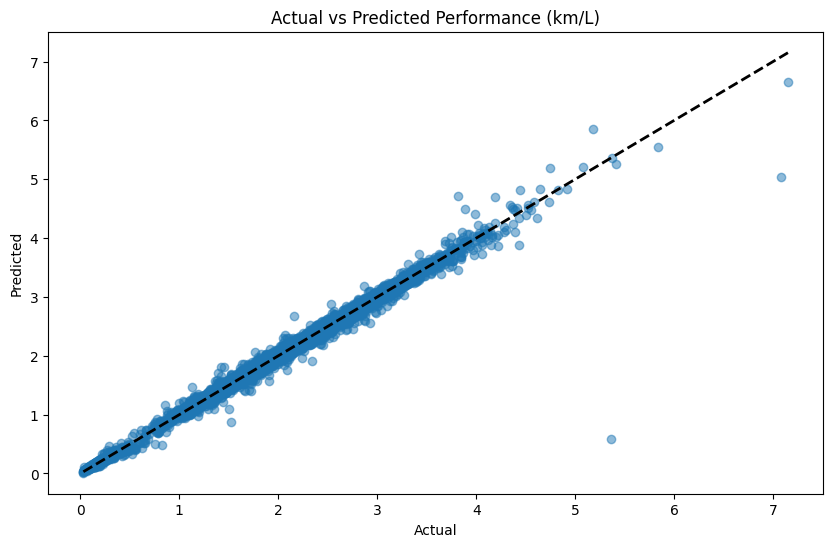

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

# Dropping columns
columns_to_drop = ['Customer Id', 'Customer Name', 'Driver Id', 'Machine Name', 'Driver Name',
                   'Start Date_y', 'End Date','Start Date_x', 'Finish date', 'Start address', 'End address']
df = df.drop(columns=columns_to_drop)

X = df.drop('Performance (km/L)', axis=1)
y = df['Performance (km/L)']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

# Evaluating
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Feature Importance
feature_importances = xgb_model.feature_importances_

import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Performance (km/L)')
plt.show()

In [ ]:
print(df.columns)

Index(['Distance (km)_x', 'Over Speed Score', 'Over speed count',
       'Max. Speed (km)', 'Over RPM Score', 'Over RPM count', 'Max. Rpm (rpm)',
       'Harsh Brake Score', 'Harsh brake count', 'Max. brake (km/h/s)',
       'Exessive Idle Score', 'excessiveidlecount', 'excessiveidletime (h)',
       'Green Band Score', 'Green band total seconds (h)',
       'Over Acceleration Score', 'Over acceleration count',
       'Max. acceleration (rpm)', 'Total Score (%)', 'Distance (km)_y',
       'Operation Time (h)', 'Engine Time (h)', 'Consumption (L)', 'Ton CO2',
       'Flow (mL/s)', 'Performance (km/L)', 'Green Band (%)', 'Odometer (km)',
       'Horometer (h)'],
      dtype='object')


Optimized MSE: 0.006899255410524884


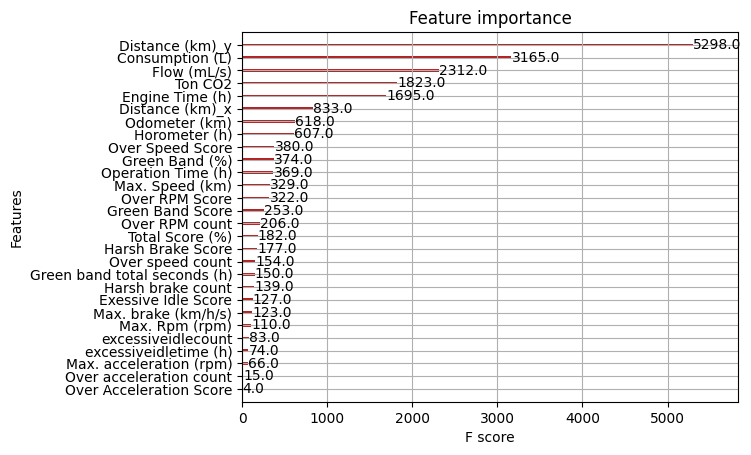

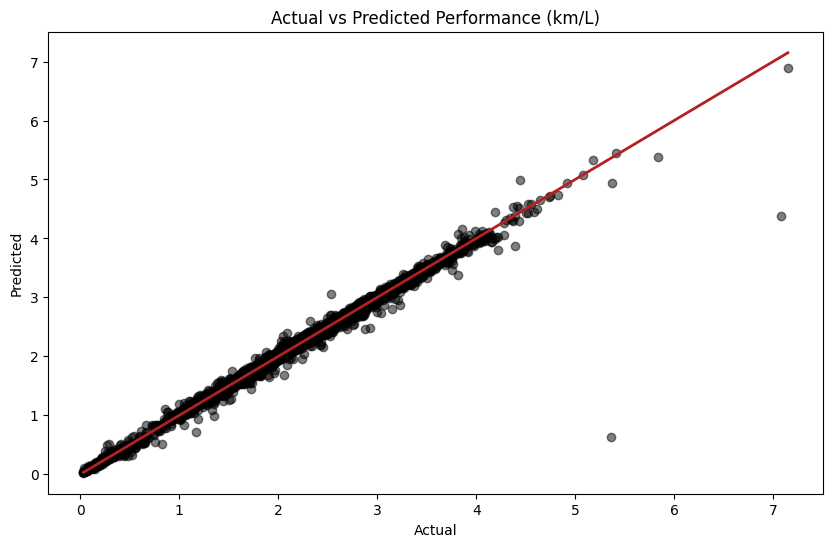

In [ ]:
from xgboost import XGBRegressor, cv, DMatrix, plot_importance
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'reg_lambda': [1, 10]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3,
                           scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Optimized MSE: {mse}")

# Plot
plot_importance(best_model, color = 'firebrick')
plt.show()

# plot for pred v actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color = 'black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2, color = 'firebrick')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Performance (km/L)')
plt.show()

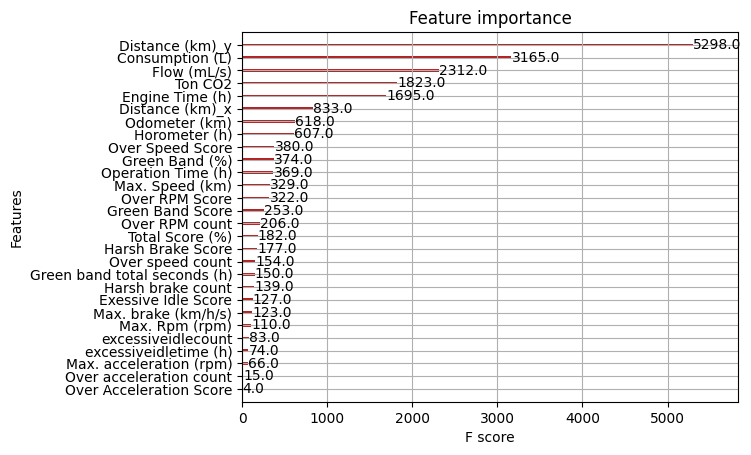

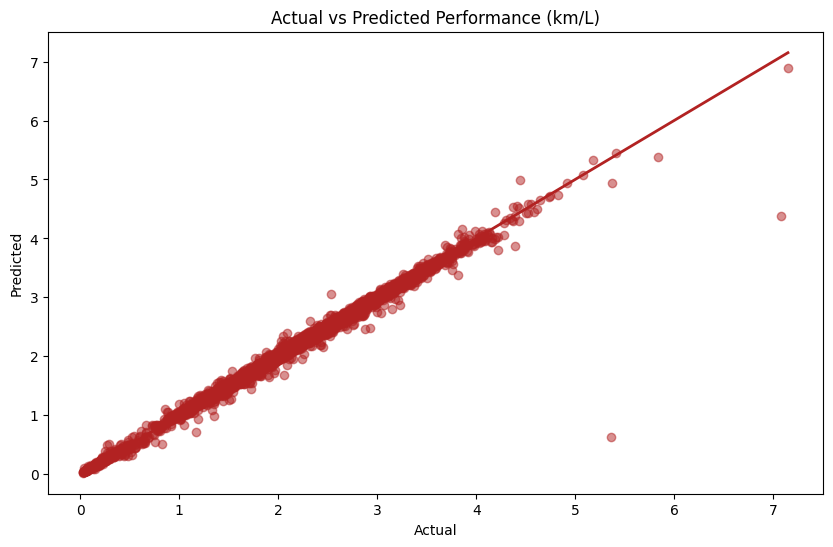

In [ ]:
# Plot
plot_importance(best_model, color = 'firebrick')
plt.show()

# plot for pred v actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color = 'firebrick')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2, color = 'firebrick')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Performance (km/L)')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from xgboost import plot_importance

y_pred = best_model.predict(X_test)

# Calculating metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


feature_importances = best_model.feature_importances_

importance_series = pd.Series(feature_importances, index=X_train.columns)

sorted_importances = importance_series.sort_values(ascending=False)

importance_text = sorted_importances.to_string()

print("Feature Importance Scores:\n")
print(importance_text)

Mean Absolute Error (MAE): 0.04
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.09
R-squared (R²): 0.99


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

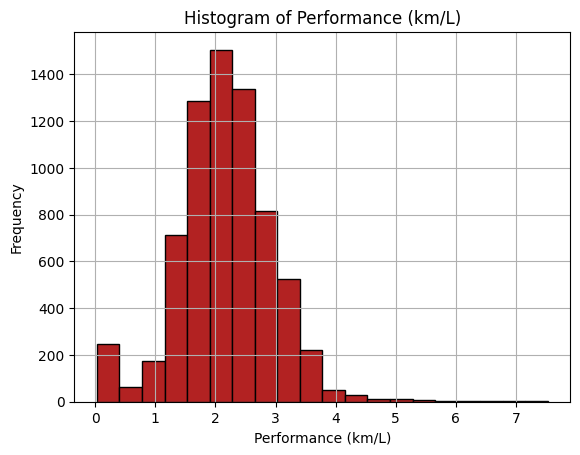

In [ ]:
import matplotlib.pyplot as plt
performance_data = df['Performance (km/L)']

plt.hist(performance_data, bins=20, color='firebrick', edgecolor='black')
plt.title('Histogram of Performance (km/L)')
plt.xlabel('Performance (km/L)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Mean Squared Error: 0.005454596013643785


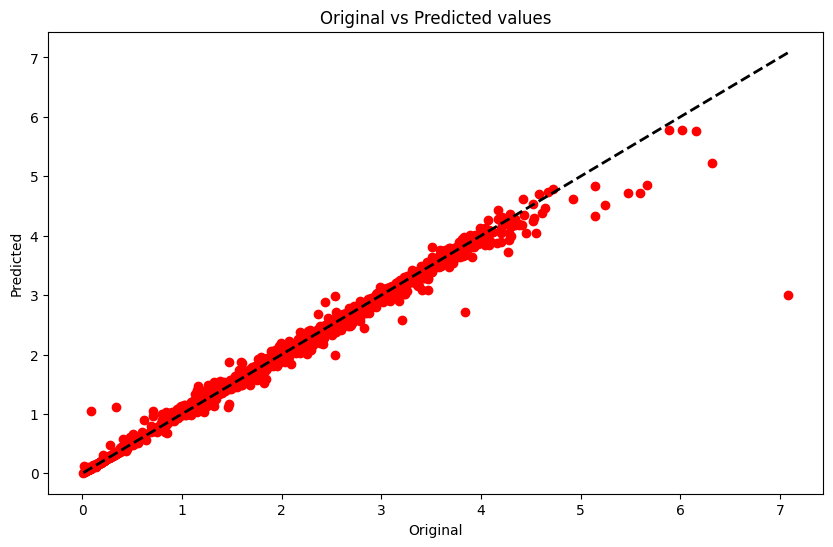

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

X = df.drop(columns=["Performance (km/L)"])
y = df["Performance (km/L)"]

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=76)

rf_model = RandomForestRegressor(n_estimators=100, random_state=76)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

comparison_df = pd.DataFrame({"Original": y_test, "Predicted": y_pred})

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.title('Original vs Predicted values')
plt.show()

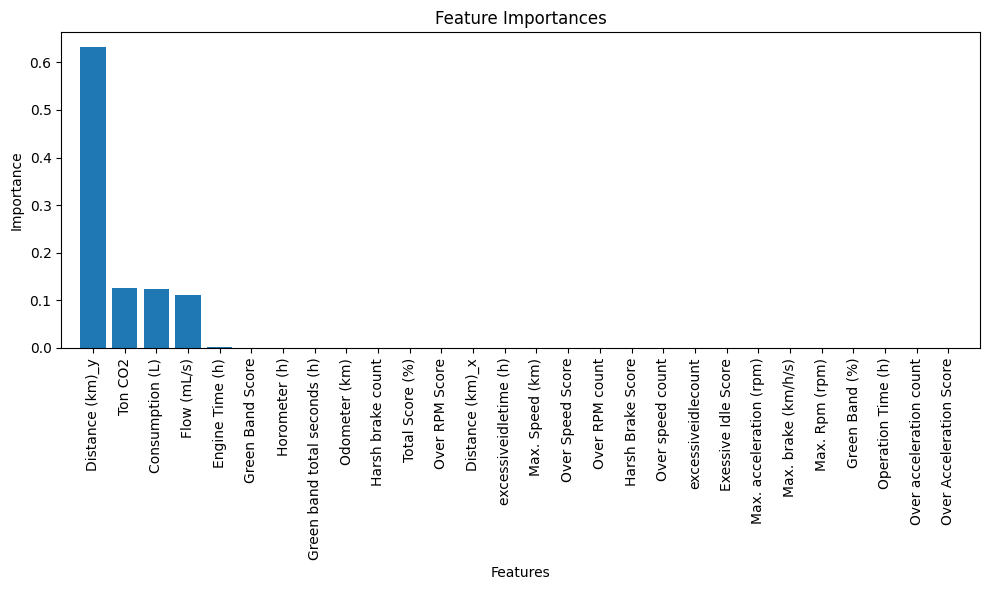

In [ ]:
feature_importances = rf_model.feature_importances_

indices = feature_importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
### Final model for presentation

In [ ]:
import pandas as pd
df = pd.read_csv("newdatasetcpstn.csv", delimiter = ",")
df.columns

Index(['Customer Id', 'Customer Name', 'Driver Id', 'Machine Name',
       'Start Date_x', 'Finish date', 'Distance (km)_x', 'Over Speed Score',
       'Over speed count', 'Max. Speed (km)', 'Over RPM Score',
       'Over RPM count', 'Max. Rpm (rpm)', 'Harsh Brake Score',
       'Harsh brake count', 'Max. brake (km/h/s)', 'Exessive Idle Score',
       'excessiveidlecount', 'excessiveidletime (h)', 'Green Band Score',
       'Green band total seconds (h)', 'Over Acceleration Score',
       'Over acceleration count', 'Max. acceleration (rpm)', 'Total Score (%)',
       'Driver Name', 'Start Date_y', 'End Date', 'Distance (km)_y',
       'Operation Time (h)', 'Engine Time (h)', 'Consumption (L)', 'Ton CO2',
       'Flow (mL/s)', 'Performance (km/L)', 'Green Band (%)', 'Odometer (km)',
       'Horometer (h)', 'Start address', 'End address'],
      dtype='object')

In [ ]:
df = df[~((df["Performance (km/L)"].isnull()) | (df["Performance (km/L)"] > 10) | (df["Performance (km/L)"] == 0.0))]


In [ ]:
columns_to_drop = ['Customer Id', 'Customer Name', 'Driver Id', 'Machine Name', 'Driver Name',
                   'Start Date_y', 'End Date','Start Date_x', 'Finish date', 'Start address', 'End address',
                   'Distance (km)_y', 'Ton CO2', 'Engine Time (h)', 'Distance (km)_x', 'Consumption (L)',
                   'Ton CO2', 'Odometer (km)', 'Horometer (h)', 'Operation Time (h)', 'Flow (mL/s)']

df = df.drop(columns=columns_to_drop)


In [ ]:
df.columns

Index(['Over Speed Score', 'Over speed count', 'Max. Speed (km)',
       'Over RPM Score', 'Over RPM count', 'Max. Rpm (rpm)',
       'Harsh Brake Score', 'Harsh brake count', 'Max. brake (km/h/s)',
       'Exessive Idle Score', 'excessiveidlecount', 'excessiveidletime (h)',
       'Green Band Score', 'Green band total seconds (h)',
       'Over Acceleration Score', 'Over acceleration count',
       'Max. acceleration (rpm)', 'Total Score (%)', 'Performance (km/L)',
       'Green Band (%)'],
      dtype='object')

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance

all_actual_values3 = []
all_predicted_values3 = []

df = df.dropna(subset=['Performance (km/L)'])
df = df[np.isfinite(df['Performance (km/L)'])]

X = df.drop(columns=['Performance (km/L)'])
y = df['Performance (km/L)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

df = df.dropna(subset=['Performance (km/L)'])
df = df[np.isfinite(df['Performance (km/L)'])]

k_fold = KFold(n_splits=3, shuffle=True, random_state=24)
mse_scores = []

for train_index, test_index in k_fold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    xgb_model = xgb.XGBRegressor(n_estimators= 200,
                                 max_depth=4,
                                 reg_lambda = 5,
                                 objective ='reg:squarederror',
                                 random_state=24)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    all_actual_values3.extend(y_test)
    all_predicted_values3.extend(y_pred)

average_mse = np.mean(mse_scores)
print("Average Mean Squared Error:", average_mse)

Average Mean Squared Error: 0.577595838542268


In [ ]:
import random

random.seed(24)
sample_indices = random.sample(range(len(all_actual_values3)), 1000)
sample_actual_values = [all_actual_values3[i] for i in sample_indices]
sample_predicted_values = [all_predicted_values3[i] for i in sample_indices]

plt.figure(figsize=(8, 6))
plt.scatter(sample_actual_values, sample_predicted_values, alpha=0.5, color='firebrick')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Sample of 1000 Points)')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

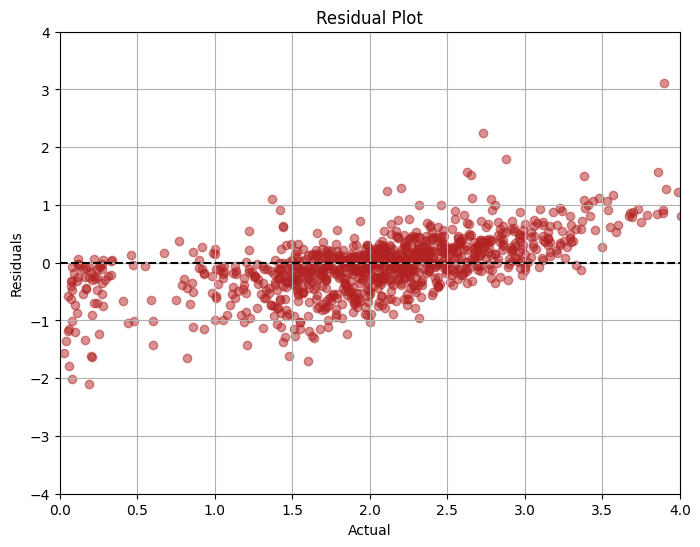

In [ ]:
residuals = [actual - predicted for actual, predicted in zip(sample_actual_values, sample_predicted_values)]

# Plot residual plot
plt.figure(figsize=(8, 6))
plt.scatter(sample_actual_values, residuals, alpha=0.5, color='firebrick')
plt.axhline(y=0, color='black', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.xlim(0, 4)
plt.ylim(-4, 4)
plt.grid(True)
plt.show()

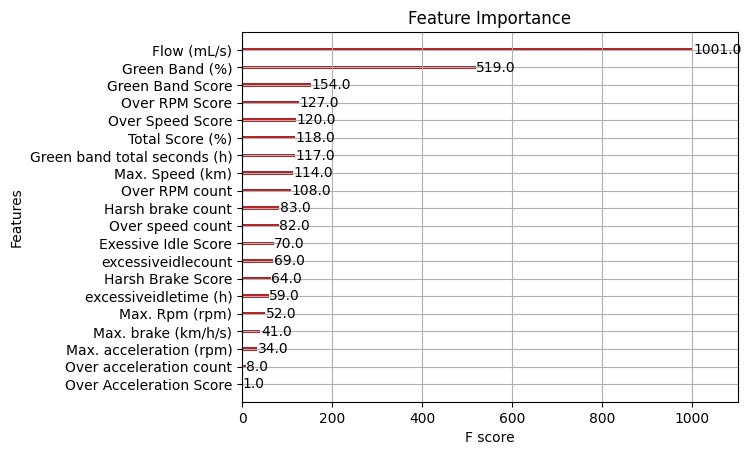

In [ ]:
from xgboost import plot_importance
plot_importance(xgb_model, color = 'firebrick')
plt.title("Feature Importance")
plt.show()